# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

A： 1.All costs between two nodes are positive or zero.
  
   2.Sort the list used to maintain the searching history in every iteration.
   

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

Yes, I believe there are two methods:

1.record all possible paths and compare them after searching end

2.using Iterative DFS

Iterative DFS: Limit depth for all paths of DFS. If goal isn't in the depth, extend depth for searching.

In [2]:
# A simple example code for IDFS

def idfs(max_depth, root, goal):
    # if path not in depth_i, search in depth_i+1
    for depth in range(1, max_depth+1):
        found = dfs(depth, root, goal)
        if found == goal: return found
    return None

def dfs(depth, node, goal):
    if depth == 0 or node == goal:
        return node
    else:
        for child in graph(node):
            return dfs(depth-1, child, goal)

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

BFS is better when speed is more important than memory usage. If conditions are satisfied, BFS can reach the optional solution.

DFS is slow, but it uses backtracking so that using less storage.

##### 2.4 When can we use machine learning ?

There is a model, or performance that we can keep improving

The model, or rules are not easy to define (at least not easy for human)

Enough data

when we have some data,and we want to use this data to learn model that has good performance on unseen data,we can use machine learning.

##### 2.5 What is the gradient of a function ?

Gradient is the direction that makes directional derivative maximum. Gradient direction of the function is the direction that function has the fastest change.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

If the function doesn't has local optimal, follow the positive direction of gradient till gradient equals zero

Else, sometimes we can only find the local maximum value instead of global optimal. Maybe try with several different random start will help.

#### 3. 实践部分  寻找地铁路线

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [3]:
# Shanghai Subway
# Source data from http://map.amap.com/subway/index.html?&1100 -- json data
import requests
import json

def get_page(url, headers):
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.text
        else:
            print('Request failed', response.status_code)
    except requests.exceptions.ConnectionError as e:
        print('Error', e.args)

# since we only need to get data once, there is no need for agent
url = 'http://map.amap.com/service/subway?_1571974190637&srhdata=3100_drw_shanghai.json'
headers = {
    'Host': 'map.amap.com',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7'
}

page = get_page(url, headers)
page_json = json.loads(page)

In [4]:
page_json

{'s': '上海市地铁',
 'i': '3100',
 'l': [{'st': [{'rs': '650 1137|650 1137',
     'udpx': ';',
     'su': '1',
     'udsu': '1;1',
     'n': '莘庄',
     'sid': '310100025685029',
     'p': '650 1137',
     'r': '310100025685|900000059516',
     'udsi': '310100025686002;310100025685029',
     't': '1',
     'si': '310100025685029',
     'sl': '121.385373,31.111152',
     'udli': '310100025686;310100025685',
     'poiid': 'BV10025001',
     'lg': '3',
     'sp': 'XinZhuang'},
    {'rs': '681 1111',
     'udpx': ';',
     'su': '1',
     'udsu': '1;1',
     'n': '外环路',
     'sid': '310100025685028',
     'p': '681 1111',
     'r': '310100025685',
     'udsi': '310100025686003;310100025685028',
     't': '0',
     'si': '310100025685028',
     'sl': '121.393020,31.120899',
     'udli': '310100025686;310100025685',
     'poiid': 'BV10039895',
     'lg': '6',
     'sp': 'WaiHuan Lu'},
    {'rs': '702 1091',
     'udpx': ';',
     'su': '1',
     'udsu': '1;1',
     'n': '莲花路',
     'sid': '3101000

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [5]:
# extract stations data from json file
def subway_map(file):
    st_dict = dict() # initialize stations dict
    lines_dict = dict() # initialize subway lines dict
    for st_line in file['l']:
        line_name = st_line['ln']  # subway_line' name e.g.一号线
        sts = st_line['st']        # stations of the line
        lines_dict[line_name] = list()
        
        for i, st in enumerate(sts):
            # stations at begin and end only has one neighbor
            if i != 0:
                pre_st = sts[i-1]['n']
            else:
                pre_st = ''
            if i != len(sts) - 1:
                next_st = sts[i+1]['n']
            else:
                next_st = ''
            
            cur_st = st['n']                                 # statiom name e.g.上海火车站
            st_loc = list(map(float, tuple(st['sl'].split(','))))   # station location (longitude, latitude)
            
            # store the data to lines dict
            lines_dict[line_name].append(cur_st)
            # store the data to stations dict
            if cur_st in st_dict:
                if pre_st:
                    st_dict[cur_st]['neighbor'].add(pre_st)
                if next_st:
                    st_dict[cur_st]['neighbor'].add(next_st)
            else:
                st_dict[cur_st] = {'line': line_name,
                                   'loc': st_loc,
                                   'neighbor': set(neighbor for neighbor in [pre_st, next_st] if neighbor)
                                  }
    return st_dict, lines_dict

In [6]:
stations, lines = subway_map(page_json)

In [7]:
stations

{'莘庄': {'line': '1号线',
  'loc': [121.385373, 31.111152],
  'neighbor': {'外环路', '春申路'}},
 '外环路': {'line': '1号线',
  'loc': [121.39302, 31.120899],
  'neighbor': {'莘庄', '莲花路'}},
 '莲花路': {'line': '1号线',
  'loc': [121.40291, 31.1309],
  'neighbor': {'外环路', '锦江乐园'}},
 '锦江乐园': {'line': '1号线',
  'loc': [121.414107, 31.142217],
  'neighbor': {'上海南站', '莲花路'}},
 '上海南站': {'line': '1号线',
  'loc': [121.430041, 31.154579],
  'neighbor': {'漕宝路', '石龙路', '锦江乐园'}},
 '漕宝路': {'line': '1号线',
  'loc': [121.433143, 31.168344],
  'neighbor': {'上海体育馆', '上海南站', '桂林公园', '龙漕路'}},
 '上海体育馆': {'line': '1号线',
  'loc': [121.437423, 31.182813],
  'neighbor': {'上海体育场', '徐家汇', '漕宝路'}},
 '徐家汇': {'line': '1号线',
  'loc': [121.436837, 31.195338],
  'neighbor': {'上海体育馆', '上海游泳馆', '交通大学', '宜山路', '肇嘉浜路', '衡山路'}},
 '衡山路': {'line': '1号线',
  'loc': [121.446424, 31.204528],
  'neighbor': {'常熟路', '徐家汇'}},
 '常熟路': {'line': '1号线',
  'loc': [121.449141, 31.213524],
  'neighbor': {'肇嘉浜路', '衡山路', '陕西南路', '静安寺'}},
 '陕西南路': {'line': '1号线',


In [8]:
lines

{'1号线': ['莘庄',
  '外环路',
  '莲花路',
  '锦江乐园',
  '上海南站',
  '漕宝路',
  '上海体育馆',
  '徐家汇',
  '衡山路',
  '常熟路',
  '陕西南路',
  '黄陂南路',
  '人民广场',
  '新闸路',
  '汉中路',
  '上海火车站',
  '中山北路',
  '延长路',
  '上海马戏城',
  '汶水路',
  '彭浦新村',
  '共康路',
  '通河新村',
  '呼兰路',
  '共富新村',
  '宝安公路',
  '友谊西路',
  '富锦路'],
 '2号线': ['浦东国际机场',
  '海天三路',
  '远东大道',
  '凌空路',
  '川沙',
  '华夏东路',
  '创新中路',
  '唐镇',
  '广兰路',
  '金科路',
  '张江高科',
  '龙阳路',
  '世纪公园',
  '上海科技馆',
  '世纪大道',
  '东昌路',
  '陆家嘴',
  '南京东路',
  '人民广场',
  '南京西路',
  '静安寺',
  '江苏路',
  '中山公园',
  '娄山关路',
  '威宁路',
  '北新泾',
  '淞虹路',
  '虹桥2号航站楼',
  '虹桥火车站',
  '徐泾东'],
 '3号线': ['江杨北路',
  '铁力路',
  '友谊路',
  '宝杨路',
  '水产路',
  '淞滨路',
  '张华浜',
  '淞发路',
  '长江南路',
  '殷高西路',
  '江湾镇',
  '大柏树',
  '赤峰路',
  '虹口足球场',
  '东宝兴路',
  '宝山路',
  '上海火车站',
  '中潭路',
  '镇坪路',
  '曹杨路',
  '金沙江路',
  '中山公园',
  '延安西路',
  '虹桥路',
  '宜山路',
  '漕溪路',
  '龙漕路',
  '石龙路',
  '上海南站'],
 '4号线': ['宜山路',
  '虹桥路',
  '延安西路',
  '中山公园',
  '金沙江路',
  '曹杨路',
  '镇坪路',
  '中潭路',
  '上海火车站',
  '宝山路',
  '海伦路',
  '临平路',
  '大连路',
  '杨树浦路',
  '浦东

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [10]:
# make map colorful. Transfer stations' color is black
color_map = {'1号线': 'brown',
             '2号线': 'red',
             '3号线': 'coral',
             '4号线': 'gold',
             '5号线': 'darkkhaki',
             '6号线': 'olive',
             '7号线': 'olivedrab',
             '8号线': 'palegreen',
             '9号线': 'turquoise',
             '10号线': 'teal',
             '11号线': 'c',
             '12号线': 'deepskyblue',
             '13号线': 'steelblue',
             '16号线': 'royalblue',
             '17号线': 'midnightblue',
             '磁悬浮': 'blueviolet',
             '浦江线': 'purple',
             '换乘站': 'black'
            }
def get_color(station, stations):
    if is_transfer_st(station):
        return color_map['换乘站']
    else:
        return color_map[stations[station]['line']]

def is_transfer_st(station):
    count = 0
    for line in lines.keys():
        if station in lines[line]:
            count += 1
    if count > 1: return True
    else: return False

C:\Users\lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


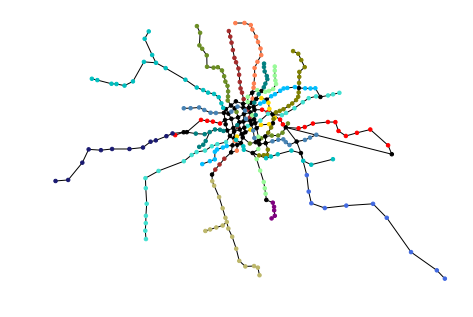

In [11]:
test_graph = nx.Graph({st: stations[st]['neighbor'] for st in stations.keys()})
test_graph.add_nodes_from(list(stations.keys()))
nx.draw(test_graph, {st: stations[st]['loc'] for st in stations.keys()}, 
        node_color=[get_color(st, stations) for st in stations.keys()], with_labels=False, node_size=12)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [24]:
# stations' neighbor graph
neighbor_graph = {st: stations[st]['neighbor'] for st in stations.keys()}

# search_agent
def search_agent(departure, arrival, search_method, graph=neighbor_graph, search_strategy=lambda x:x, show_graph=True):
    path = search_method(graph, departure, arrival, search_strategy)
    if departure not in graph or arrival not in graph:
        print('Input error.')
    
    if path:
        if show_graph:
            draw_path(path)
        print('The best path is ' + '->'.join(path))

# draw the path
def draw_path(path):
    path_graph = nx.DiGraph({path[i]: [path[i+1]] for i in range(len(path) - 1)})
    path_graph.add_nodes_from(path)
    nx.draw(path_graph, {st: stations[st]['loc'] for st in path}, 
            node_color = [get_color(st, stations) for st in path], 
            with_labels=True, node_size=50, width=5, font_size=15, alpha=0.7, figsize=(10, 5))
def move_loc(l):
    return [l[0], l[1] * 0.9]

In [25]:
# search_method

# bfs
def optimal_search(graph, start, destination, search_strategy):
    paths = [[start]]
    visited = set()
    while paths:
        path = paths.pop(0)
        froniter = path[-1]
        
        for city in graph[froniter]:
            if city in visited: continue
            
            new_path = path + [city]
            
            paths.append(new_path)

        paths = search_strategy(paths)
        visited.add(froniter)
        if paths and paths[0][-1] == destination:
            return paths[0]
    return []

# dfs

def dfs(graph, start, destination, search_strategy):
    paths = [[start]]
    visited = set()
    while paths:
        path = paths.pop(0)
        froniter = path[-1]
        
        for city in graph[froniter]:
            if city in visited: continue
            
            new_path = path + [city]
            
            paths = [new_path] + paths

        paths = search_strategy(paths)
        visited.add(froniter)
        if paths and paths[0][-1] == destination:
            return paths[0]
    return []

The best path is 上海火车站->汉中路->南京西路->静安寺->常熟路->肇嘉浜路->徐家汇->上海体育馆->漕宝路->上海南站


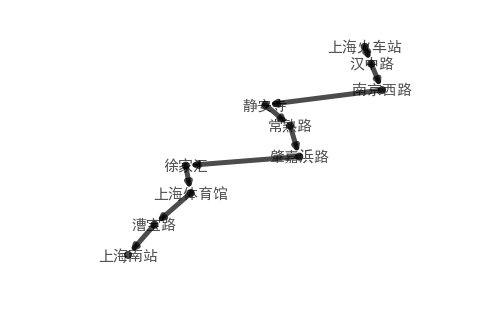

In [26]:
# test without strategies
search_agent('上海火车站', '上海南站', optimal_search)

The best path is 上海火车站->宝山路->东宝兴路->虹口足球场->西藏北路->中兴路->曲阜路->天潼路->南京东路->豫园->老西门->大世界->人民广场->黄陂南路->陕西南路->常熟路->静安寺->南京西路->汉中路->江宁路->长寿路->武宁路->隆德路->金沙江路->中山公园->延安西路->虹桥路->交通大学->徐家汇->宜山路->漕溪路->龙漕路->龙华->云锦路->龙耀路->东方体育中心->灵岩南路->上南路->华夏西路->高青路->东明路->高科西路->杨高南路->锦绣路->芳华路->龙阳路->世纪公园->上海科技馆->世纪大道->浦电路(6号线)->蓝村路->塘桥->南浦大桥->西藏南路->鲁班路->大木桥路->东安路->上海体育场->上海体育馆->漕宝路->上海南站


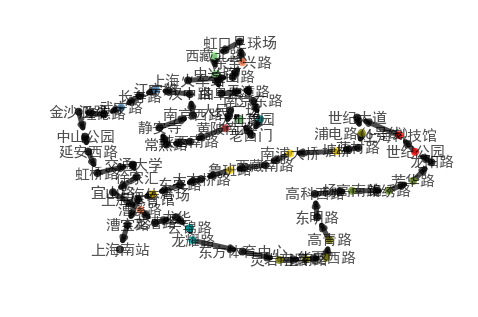

In [27]:
search_agent('上海火车站', '上海南站', dfs)

### (Optional) Improve your agent to make it able to find a path based on different strategies

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

# strategy 1 ----> minimum transfers (transfer means from one line to another)

In [28]:
def mini_transfer(paths):
    def n_transfer(path):
        count = 0
        # for every node (except first and end), if the pre_node and next_node in different line, transfer happens
        for i in range(1, len(path)-1):
            if is_same_line(path[i-1], path[i+1]):
                continue
            else:
                count += 1
        return count
    return sorted(paths, key=n_transfer)
def is_same_line(pre_node, next_node):
    pre_line = set([l for l in lines.keys() if pre_node in lines[l]])
    next_line = set([l for l in lines.keys() if next_node in lines[l]])
        
    return pre_line & next_line

Minimum statios:
The best path is 上海火车站->汉中路->南京西路->静安寺->常熟路->肇嘉浜路->徐家汇->上海体育馆->漕宝路->上海南站

Minimum transfers
The best path is 上海火车站->汉中路->新闸路->人民广场->黄陂南路->陕西南路->常熟路->衡山路->徐家汇->上海体育馆->漕宝路->上海南站


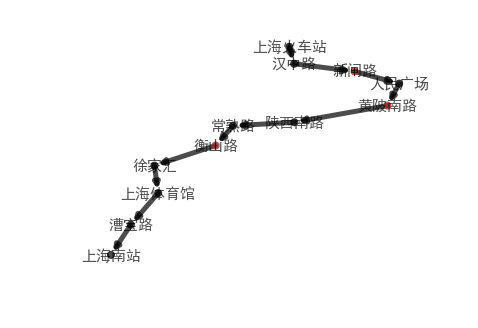

In [29]:
print('Minimum statios:')
search_agent('上海火车站', '上海南站', optimal_search, show_graph=False)
print()
print('Minimum transfers')
search_agent('上海火车站', '上海南站', optimal_search, search_strategy=mini_transfer)

# strategy 2 ---> minimum time cost

In [30]:
# calculate the distance
import math

def loc_distance(begin, destination):
    """
    Calculate the Haversine distance.
    
    Parameters:
    begin: tuple of float (long, lat)
    destination: tuple of float (long, lat)
    
    Returns: distance in km: float
    """
    rlong1, rlat1 = map(math.radians, begin) #角度转换为弧度
    rlong2, rlat2 = map(math.radians, destination)
    radius = 6371 # km
    
    d = radius * math.acos(math.cos(rlat1) * math.cos(rlat2) * math.cos(rlong1 - rlong2) + 
                  math.sin(rlat1) * math.sin(rlat2))
    return d
def st_distance(st1, st2):
    return loc_distance(stations[st1]['loc'], stations[st2]['loc'])

In [31]:
# calculate the time cost in min between two neighbor stations
subway_speed = 70 # km/h
def time_cost(st1, st2):
    return 60 * st_distance(st1, st2) / subway_speed

In [32]:
st_distance('上海火车站', '汉中路')

0.864673310779073

In [33]:
time_cost('上海火车站', '汉中路')

0.7411485520963482

In [34]:
# minimum time cost strategy
def mini_time(paths):
    def time_of_path(path):
        total_time = 0
        for i in range(len(path)-1):
            total_time += time_cost(path[i], path[i+1])
        return total_time
    return sorted(paths, key=time_of_path)

Minimum statios:
The best path is 虹口足球场->西藏北路->中兴路->曲阜路->人民广场->南京西路->静安寺->常熟路->肇嘉浜路->徐家汇->上海体育馆

Minimum transfers
The best path is 虹口足球场->西藏北路->中兴路->曲阜路->人民广场->南京西路->陕西南路->嘉善路->大木桥路->龙华中路->龙华->龙漕路->漕宝路->上海体育馆

Minimum time cost
The best path is 虹口足球场->西藏北路->中兴路->曲阜路->人民广场->黄陂南路->陕西南路->常熟路->衡山路->徐家汇->上海体育馆


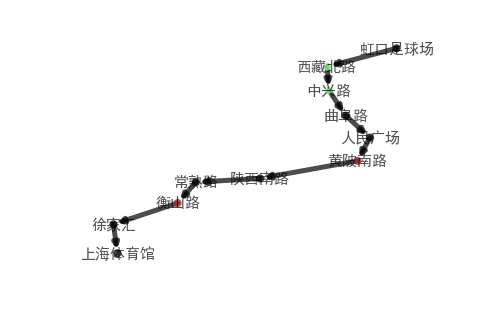

In [35]:
print('Minimum statios:')
search_agent('虹口足球场', '上海体育馆', optimal_search, show_graph=False)
print()
print('Minimum transfers')
search_agent('虹口足球场', '上海体育馆', optimal_search, search_strategy=mini_transfer, show_graph=False)
print()
print('Minimum time cost')
search_agent('虹口足球场', '上海体育馆', optimal_search, search_strategy=mini_time)

# strategy 3 ---> minimum time cost while taking transfer time into consideration

In [36]:
# minimum time cost strategy while taking transfer time into consideration
gap_time = 5 # min, average transfer time plus waiting time

def mini_time_2(paths):
    def time_of_path(path):
        total_time = 0
        for i in range(len(path)-1):
            total_time += time_cost(path[i], path[i+1])
            if i > 0 and not is_same_line(path[i-1], path[i+1]):
                total_time += gap_time
        return total_time
    return sorted(paths, key=time_of_path)

In [37]:
def best_path_test(st1, st2):
    print('Minimum statios:')
    search_agent(st1, st2, optimal_search, show_graph=False)
    print()
    print('Minimum transfers')
    search_agent(st1, st2, optimal_search, search_strategy=mini_transfer, show_graph=False)
    print()
    print('Minimum time cost without transfer time cost')
    search_agent(st1, st2, optimal_search, search_strategy=mini_time, show_graph=False)
    print()
    print('Minimum time cost with transfer time cost')
    search_agent(st1, st2, optimal_search, search_strategy=mini_time_2)

Minimum statios:
The best path is 上海火车站->汉中路->南京西路->静安寺->常熟路->肇嘉浜路->徐家汇

Minimum transfers
The best path is 上海火车站->汉中路->新闸路->人民广场->黄陂南路->陕西南路->常熟路->衡山路->徐家汇

Minimum time cost without transfer time cost
The best path is 上海火车站->汉中路->南京西路->陕西南路->常熟路->衡山路->徐家汇

Minimum time cost with transfer time cost
The best path is 上海火车站->汉中路->新闸路->人民广场->黄陂南路->陕西南路->常熟路->衡山路->徐家汇


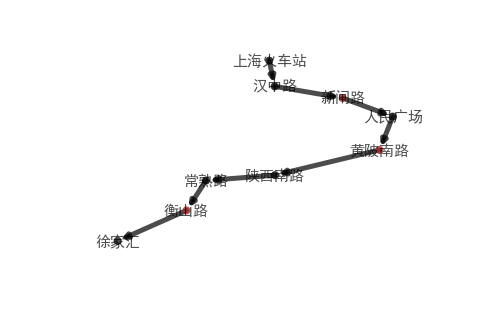

In [38]:
best_path_test('上海火车站', '徐家汇')

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 